In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
"""
The two most common types of recommender systems are content based and collaborative filtering 
"""

'\nThe two most common types of recommender systems are content based and collaborative filtering collaborative\n'

In [5]:
"""
collaborative filtering :
produces recommendations based on the knowledge of users attitude to items.
  That is it uses the wisdom of the crowd to recommend items
   eg: you can think of this as   something like Amazon 
    where based on other people's shopping experiences Amazon will suggest items that it believes you will

"""

"\ncollaborative filtering :\nproduces recommendations based on the knowledge of users attitude to items.\n  That is it uses the wisdom of the crowd to recommend items\n   eg: you can think of this as   something like Amazon \n    where based on other people's shopping experiences Amazon will suggest items that it believes you will\n\n"

In [4]:
"""
Content based recommendation systems : 
focus on the attributes of the items and give you recommendations based on the similarity between items.
  The basic difference here is filtering based on user preferences or filtering based off of the similarity between the items
  
"""


'\nContent based recommendation systems focus on the attributes of the items and give you recommendations based on the similarity between items.\n  The basic difference here is filtering based on user preferences or filtering based off of the similarity between the items\n  \n'

In [6]:
columns_names=['user_id','item_id','rating','timestamp']
df=pd.read_csv('u.data',sep='\t',names=columns_names)
#sep='\t' is used because it is a tab separated file

In [7]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [8]:
movie_title=pd.read_csv('Movie_Id_Titles')

In [9]:
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [11]:
df=pd.merge(df,movie_title,on='item_id')

In [12]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [13]:

sns.set_style('white')

In [15]:
df.groupby('title')['rating'].mean().sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [18]:
df.groupby('title')['rating'].count().sort_values(ascending=False)

title
Star Wars (1977)                      584
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [25]:
df[df['title']=='Star Wars (1977)']['rating'].sum()

2546

In [30]:
df[df['title']=='Star Wars (1977)']['rating'].count()

584

In [27]:
5*326+4*176+3*57+2*16+1*9

2546

In [31]:
ratings=pd.DataFrame(data=df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [36]:
df.groupby('title')['rating'].value_counts().sort_values(ascending=False).head()

title                      rating
Star Wars (1977)           5         326
Fargo (1996)               5         227
Godfather, The (1972)      5         214
Contact (1997)             4         212
Return of the Jedi (1983)  4         208
Name: count, dtype: int64

In [39]:
count=df.groupby('title')['rating'].count()

In [46]:
ratings['num of ratings']=df.groupby('title')['rating'].count()

In [51]:
ratings

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


<Axes: xlabel='num of ratings', ylabel='Count'>

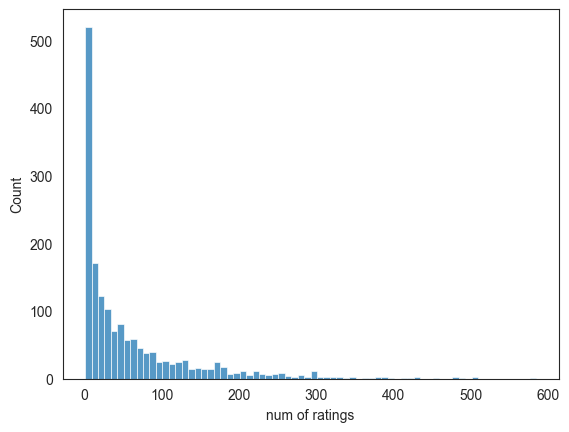

In [55]:
sns.histplot(data=ratings,x='num of ratings',bins=70)

<Axes: xlabel='rating', ylabel='Count'>

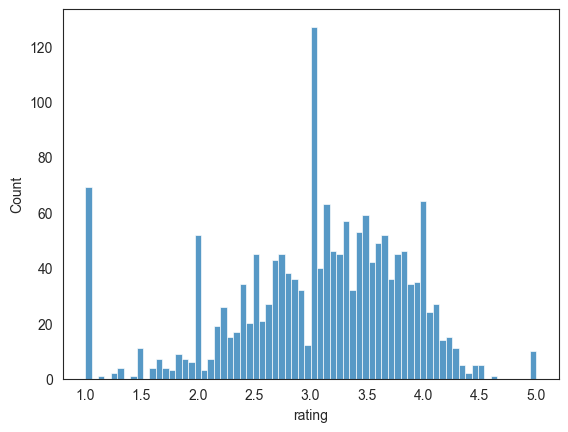

In [57]:
sns.histplot(data=ratings,x='rating',bins=70)


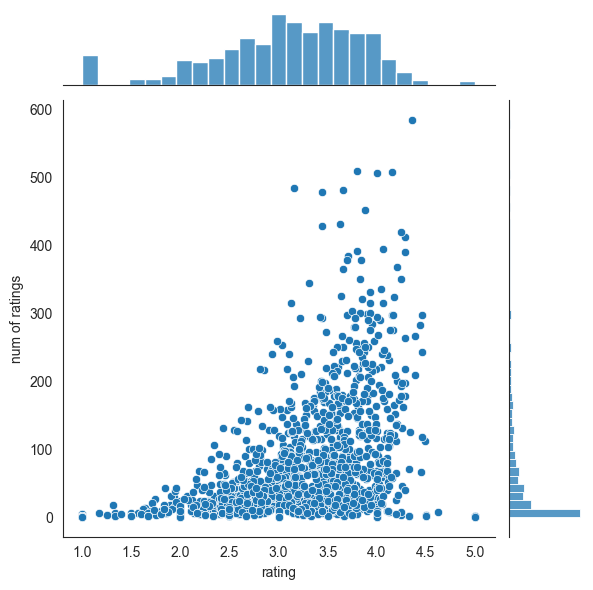

In [59]:
sns.jointplot(data=ratings,y='num of ratings',x='rating')

RECOMMENDTAION SYSTEM

In [60]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [61]:
moviemat=df.pivot_table(index='user_id',columns='title',values='rating',)

In [62]:
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
ratings.sort_values('num of ratings',ascending=False)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [64]:
ratings['num of ratings'].sort_values(ascending=False)

title
Star Wars (1977)                      584
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: num of ratings, Length: 1664, dtype: int64

In [65]:
starwars_user_ratings=moviemat['Star Wars (1977)']
liarliar_user_ratings=moviemat['Liar Liar (1997)']

In [66]:
starwars_user_ratings

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [69]:
similar_to_starwars=moviemat.corrwith(starwars_user_ratings,)
#is for the correlation of every other movie that that specific user behavior on the Star Wars movie so I can say similar Star Wars is equal to the movie Matrix which remember was

f:\EDU CODING\PYTHON STP\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
f:\EDU CODING\PYTHON STP\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
f:\EDU CODING\PYTHON STP\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
f:\EDU CODING\PYTHON STP\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
f:\EDU CODING\PYTHON STP\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


<b>
this finds correlation of all movie in moviemat (all its columns) with 'starwars_user_ratings' which is equal to moviemat['Star Wars (1977)']<u>(which is 'Star Wars (1977)' column)</u>
</b>

In [71]:
similar_to_liarliar=moviemat.corrwith(liarliar_user_ratings,)

f:\EDU CODING\PYTHON STP\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
f:\EDU CODING\PYTHON STP\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
f:\EDU CODING\PYTHON STP\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
f:\EDU CODING\PYTHON STP\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
f:\EDU CODING\PYTHON STP\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [76]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [74]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)#remove null values

In [75]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [ ]:
#correllation column tells us how correlated this movies user ratings were to the user ratings of the Star Wars movie.

In [92]:
corr_starwars.sort_values('Correlation',ascending=False)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
For Ever Mozart (1996),-1.0
Frankie Starlight (1995),-1.0
I Like It Like That (1994),-1.0


In [99]:

moviemat['Hollow Reed (1996)'].corr(moviemat['Star Wars (1977)'])

1.0

<h3>WHAT IS CORR(correlation)</h3>
<p>
The Result of the corr() method is a table with a lot of numbers that represents how well the relationship is between two columns.

The number varies from -1 to 1.

1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.

0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.

-0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.

0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.
</p>

In [105]:
#we are removing movies which have less than 100 reviews

In [107]:
ratings

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [123]:
corr_starwars=corr_starwars.join(ratings['num of ratings'])
#corr_starwars=pd.merge(corr_starwars,ratings['num of ratings'],on='title')
#used join here instead of merge is because I have the title as the index of my data frame which makes it a good fit for join method

In [125]:
corr_starwars

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [128]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('num of ratings',ascending=False)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
Contact (1997),0.134962,509
Fargo (1996),0.044415,508
Return of the Jedi (1983),0.672556,507
Liar Liar (1997),0.150292,485
...,...,...
Miracle on 34th Street (1994),0.310921,101
Pinocchio (1940),0.347868,101
Basic Instinct (1992),0.037229,101


In [129]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


<b>
#this suggest that 'Batman Forever (1995)' is more related to 'Empire Strikes Back, The (1980)'

ie. people who watch 'Star Wars (1977)' is more likely to suggest 'Empire Strikes Back, The (1980)'
</b>

In [130]:
similar_to_liarliar

title
'Til There Was You (1997)                0.118913
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.469765
12 Angry Men (1957)                      0.066272
187 (1997)                               0.175145
                                           ...   
Young Guns II (1990)                     0.352174
Young Poisoner's Handbook, The (1995)    0.445016
Zeus and Roxanne (1997)                 -0.500000
unknown                                  0.870388
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [135]:
corr_liarliar=pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)

In [136]:
corr_liarliar

,Correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739
...,...
Young Guns (1988),0.410988
Young Guns II (1990),0.352174
"Young Poisoner's Handbook, The (1995)",0.445016


In [137]:
corr_liarliar=corr_liarliar.join(ratings['num of ratings'],)

In [138]:
corr_liarliar

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93
...,...,...
Young Guns (1988),0.410988,101
Young Guns II (1990),0.352174,44
"Young Poisoner's Handbook, The (1995)",0.445016,41


In [140]:
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False)

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
...,...,...
Hoop Dreams (1994),-0.184503,117
Ed Wood (1994),-0.199481,133
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),-0.238092,194


<b>
#this suggest that 'Batman Forever (1995)' is more related to 'Liar Liar (1997)'

ie. people who watch 'Liar Liar (1997)' is more likely to suggest 'Batman Forever (1995)'
</b>